## Customer Churn Project EDA

## Problem Statement
The telecom industry is dealing with more customers leaving, and it's important to solve this problem for continuous growth and making money. The challenge is to find out why customers are leaving, create good plans to keep them, and take actions early to stop them from leaving. This problem statement is about understanding and fixing the reasons why customers are leaving the telecom industry.

## Main Objective:

To reduce customer churn by implementing strategies to significantly reduce overall customer churn rates within the telecom company.

### Specific Objectives
1. To review the telecom data and identify what may lead to customer churn.
2. To clean the data I.e check for missing values, outliers
3. Perform Exploratory Data Analysis in order to identify hidden patterns that may be in the data.

# Data Understanding
 The data is gotten from Kaggle and can be accessed using this link: https://www.kaggle.com/datasets/puja19/telcom-customer-churn?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter

 - The data contains 21 columns and the total observations are 7043.
 - These are the 21 columns:
 1.   customerID     
 2.   gender          
 3.  SeniorCitizen   
 4.   Partner       
 5.  Dependents      
 6.  tenure           
 7.  PhoneService   
 8.  MultipleLines  
 9.  InternetService
 10.  OnlineSecurity    
 11.  OnlineBackup       
 12.  DeviceProtection   
 13.  TechSupport        
 14.  StreamingTV       
 15.  StreamingMovies    
 16.  Contract           
 17. PaperlessBilling   
 18.  PaymentMethod     
 19.  MonthlyCharges    
 20.  TotalCharges      
 21.  Churn  


In [4]:
# The necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Loading the data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
#getting to understand the data
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#checking for duplicated values
df.duplicated().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


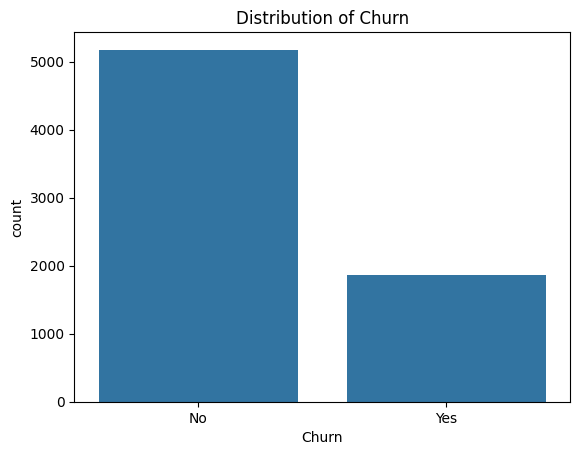

In [10]:
# Visualize the distribution of Churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

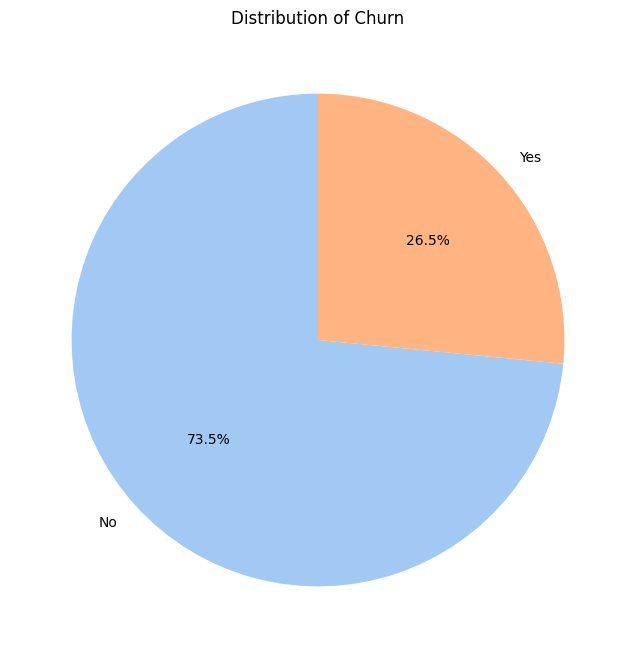

In [11]:
# Visualize the distribution of Churn using a Pie Chart
churn_distribution = df['Churn'].value_counts()
labels = churn_distribution.index
sizes = churn_distribution.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Churn')
plt.show()

<ipython-input-12-0d95014e3dcb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tenure', y='Churn', data=df, marker='o', ci=None)


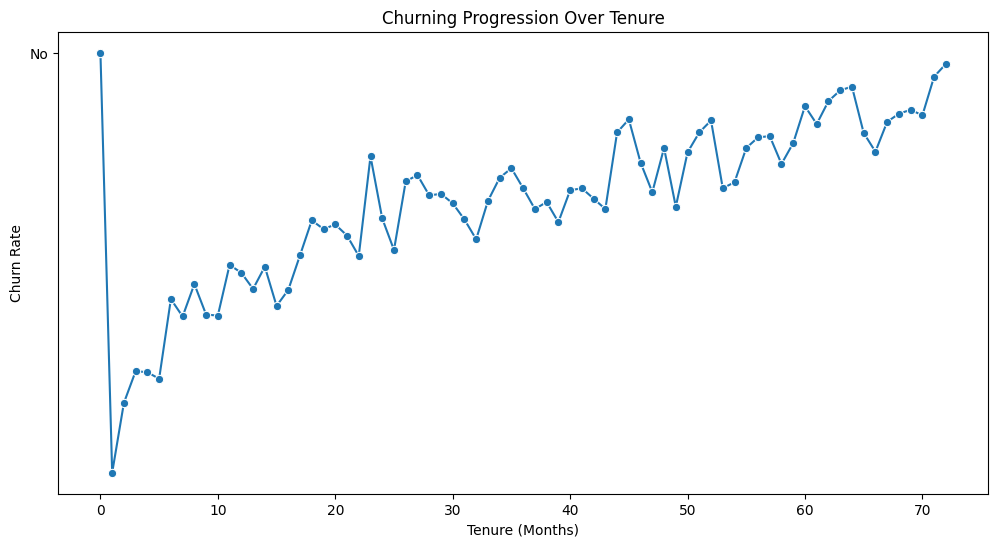

In [12]:
# progression of churning over tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x='tenure', y='Churn', data=df, marker='o', ci=None)
plt.title('Churning Progression Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.show()

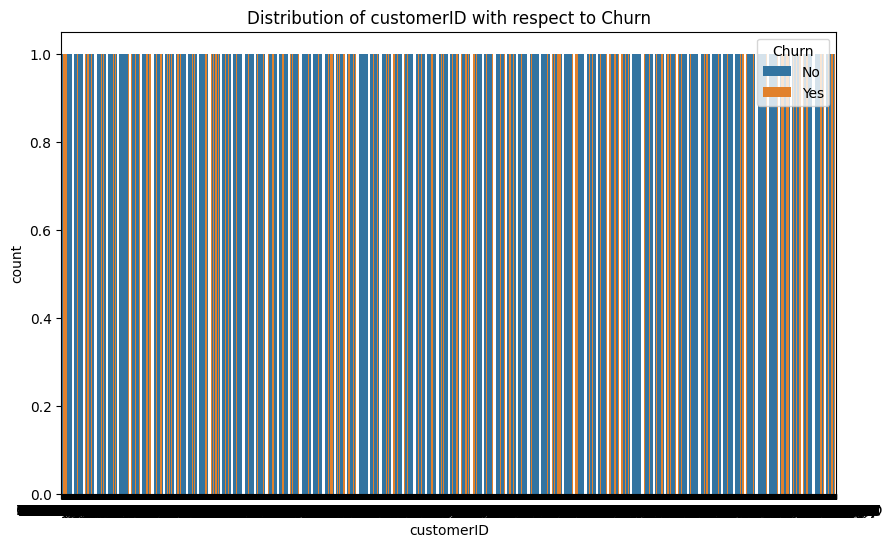

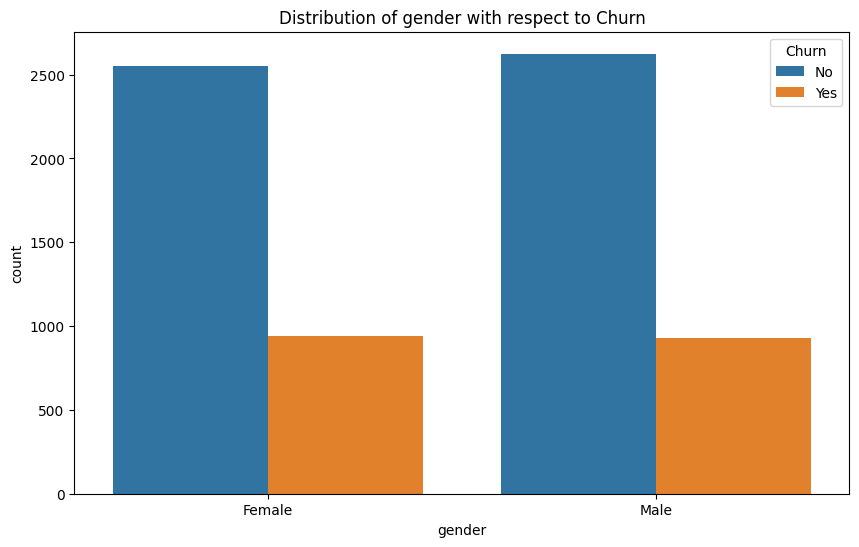

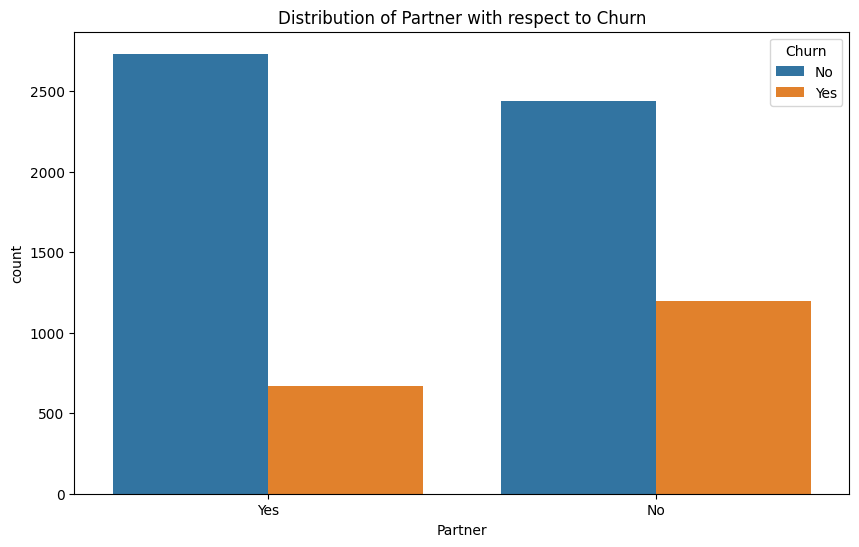

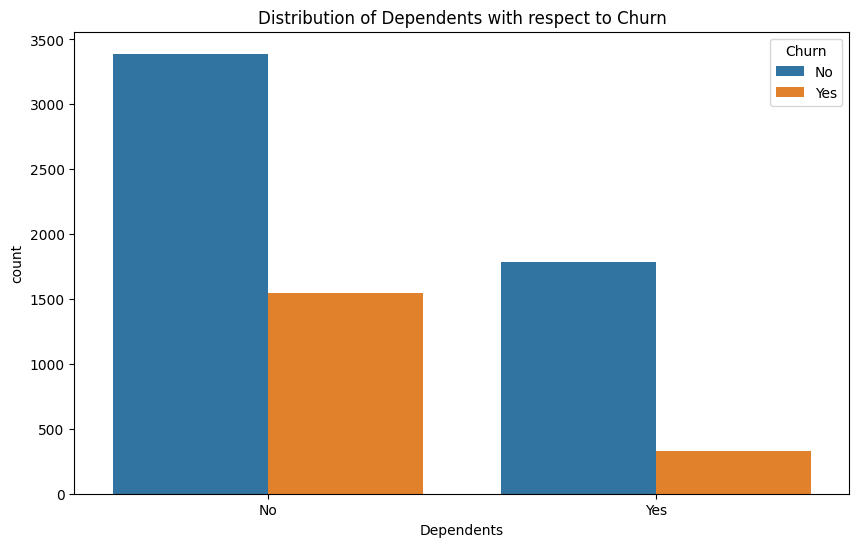

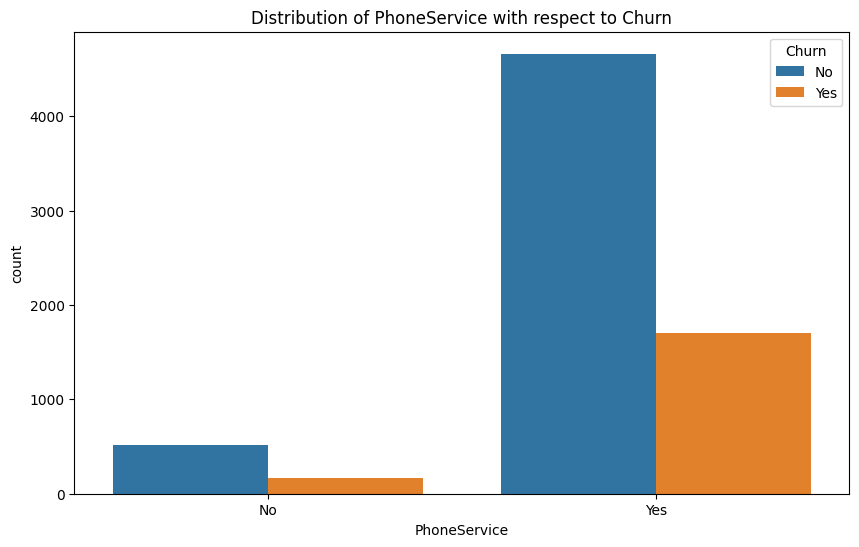

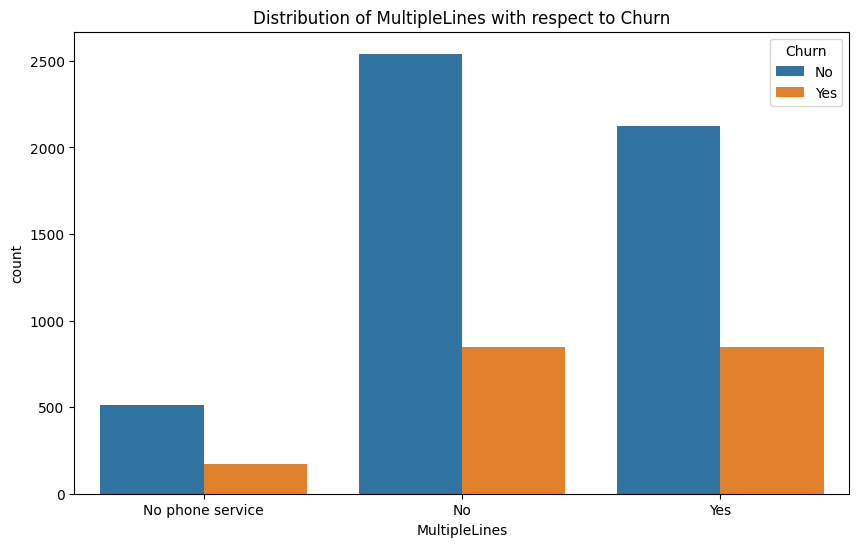

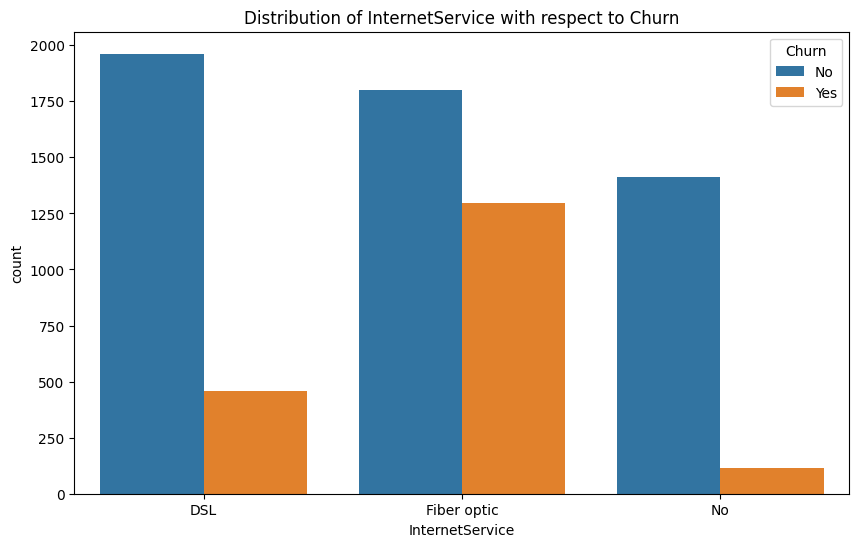

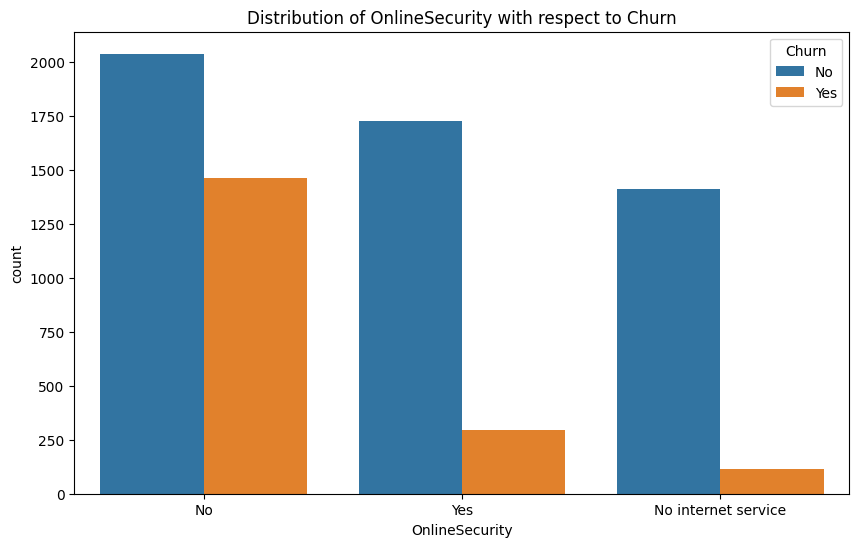

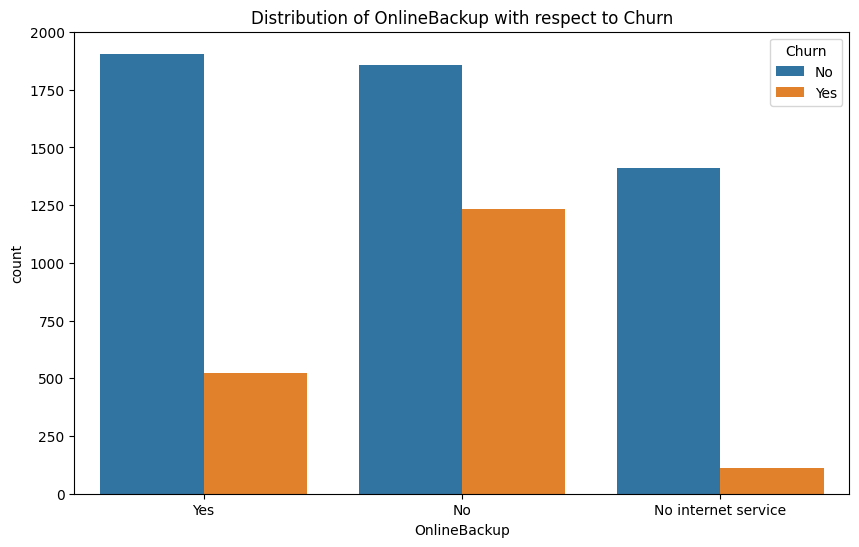

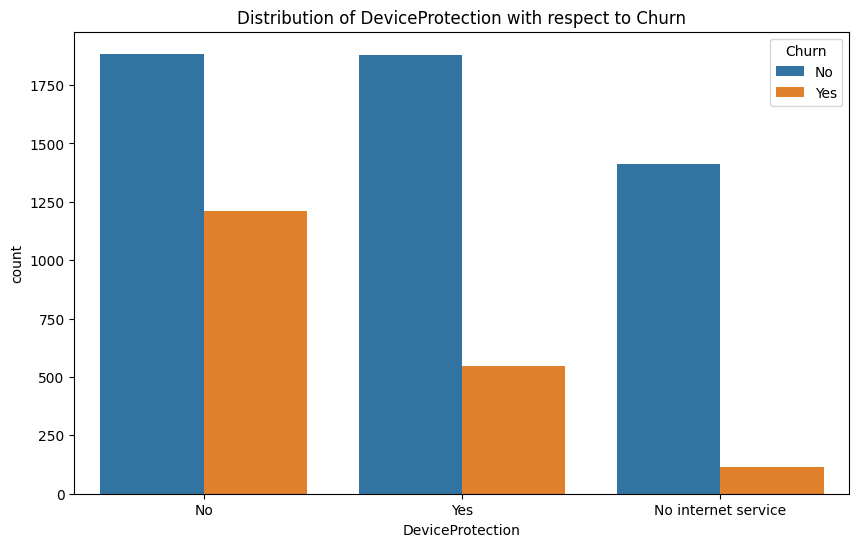

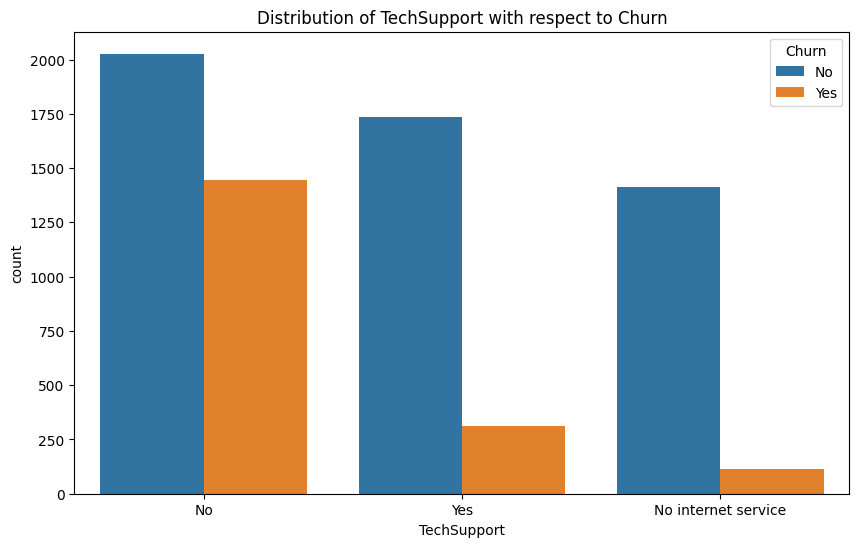

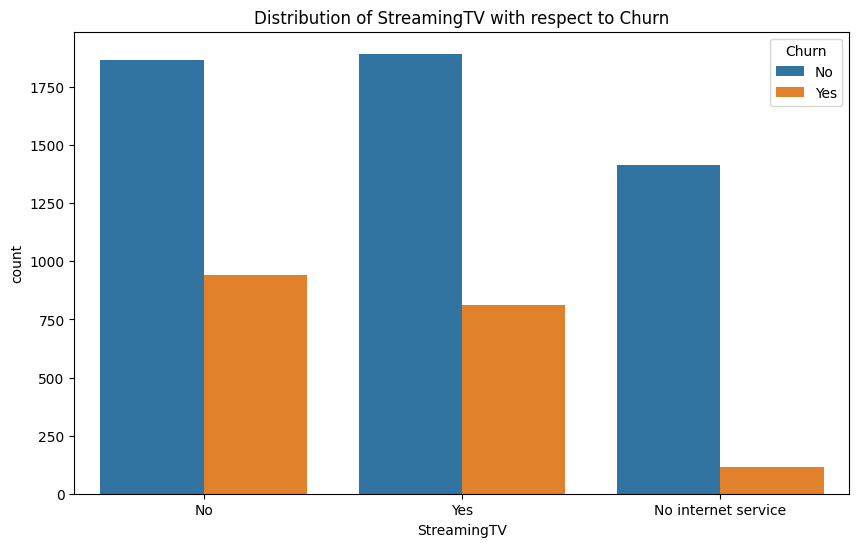

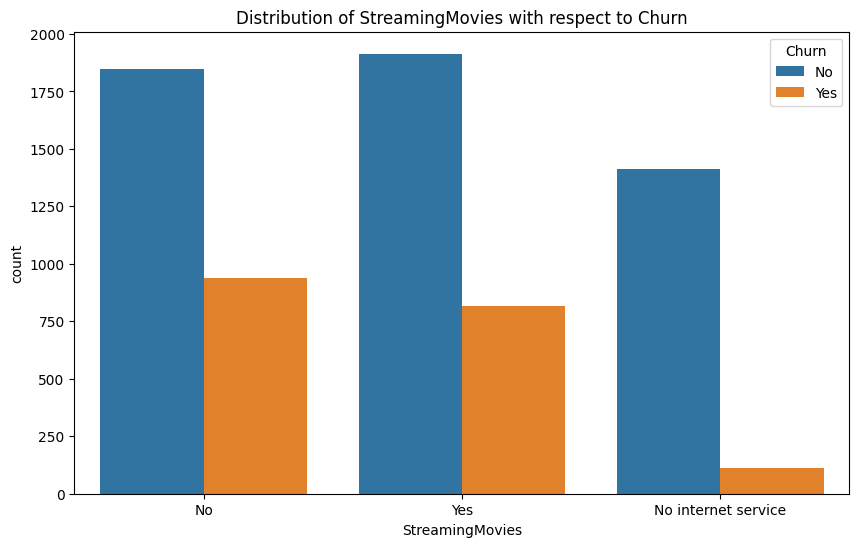

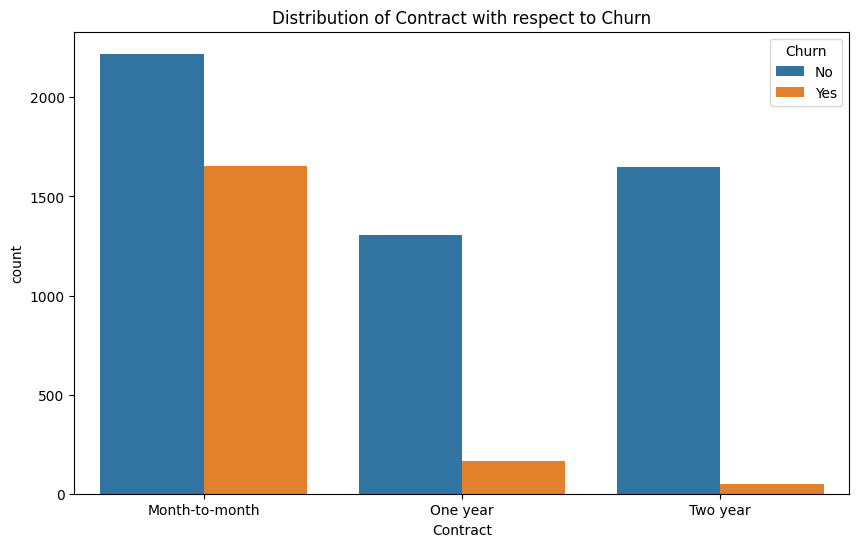

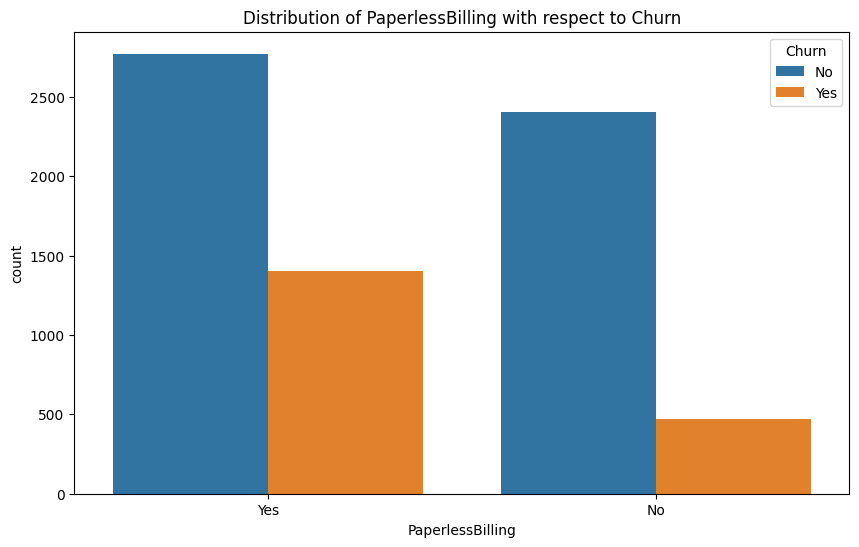

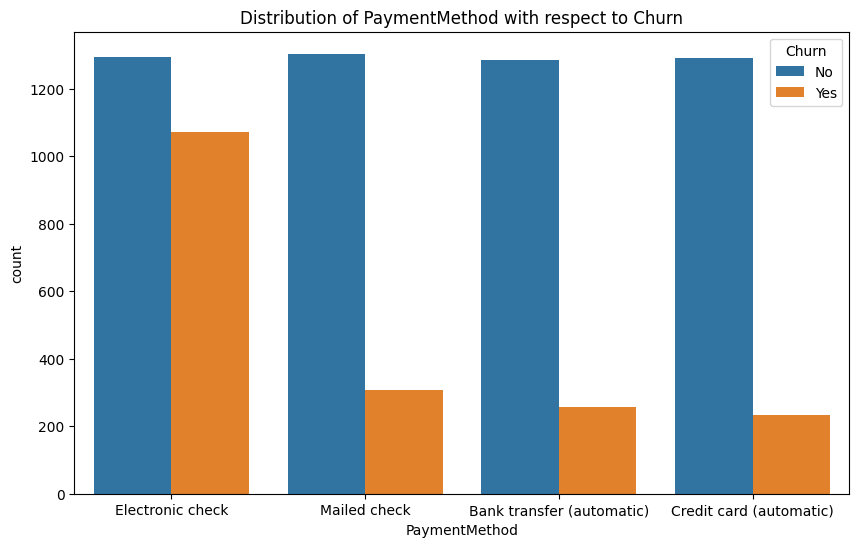

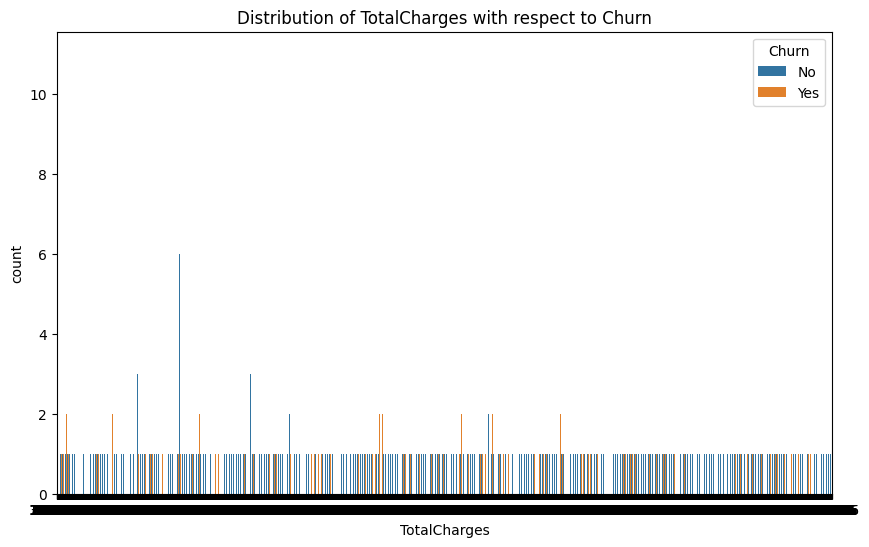

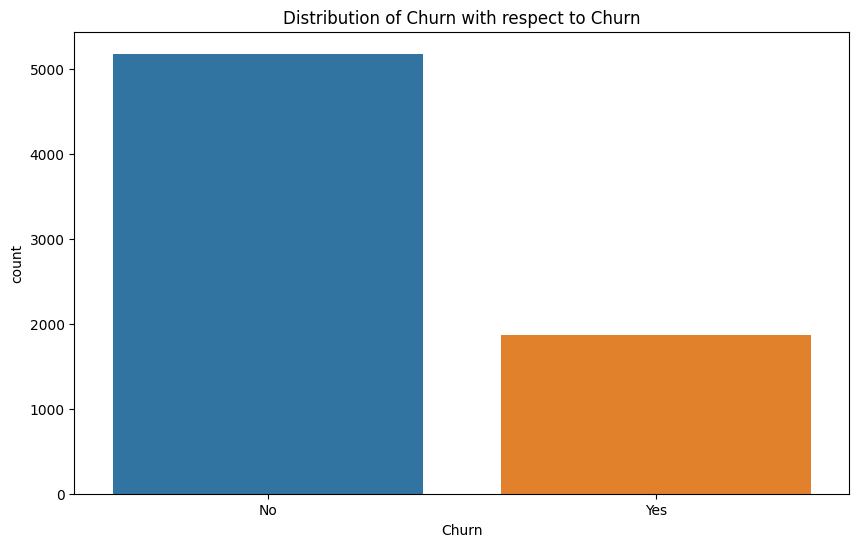

In [13]:
# Visualize the distribution of each categorical feature with respect to Churn
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} with respect to Churn')
    plt.show()

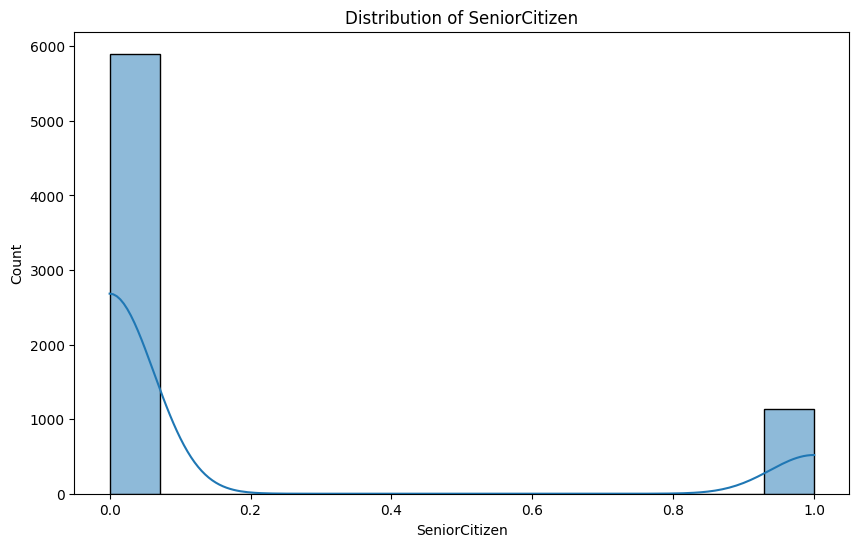

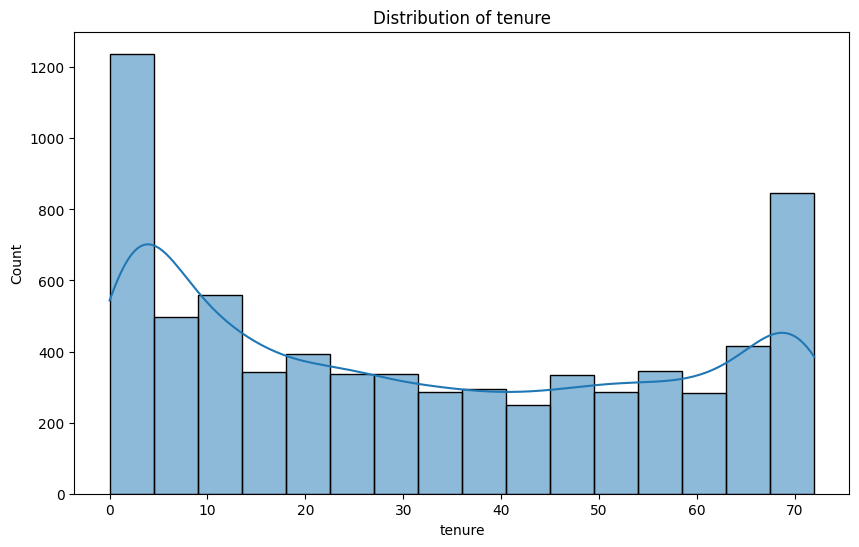

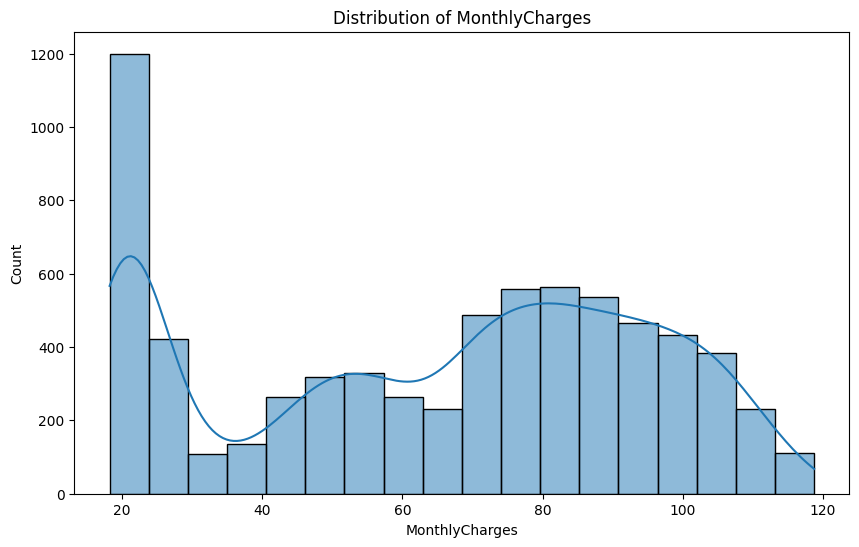

In [14]:
# Visualize the distribution of numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

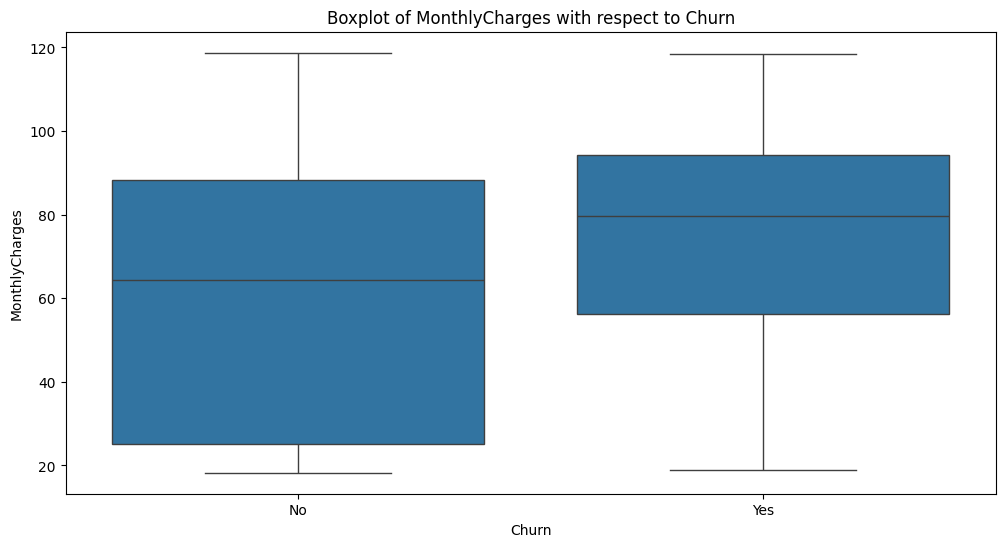

In [15]:
# Boxplot for MonthlyCharges
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot of MonthlyCharges with respect to Churn')
plt.show()

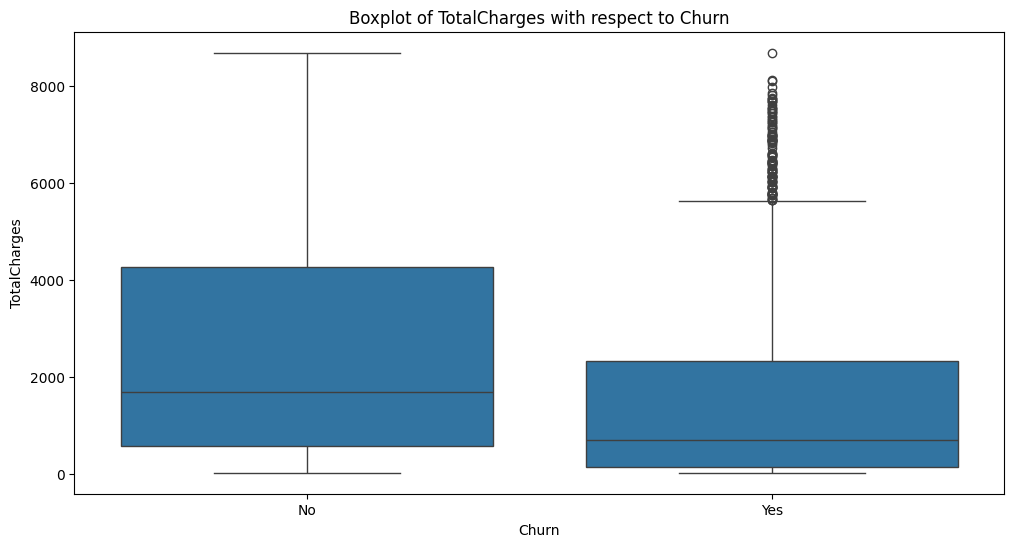

In [16]:
# Boxplot for TotalCharges
plt.figure(figsize=(12, 6))
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Boxplot of TotalCharges with respect to Churn')
plt.show()

## Recommendations
Based on the analysis conducted of the different columns against the target variable churn, I recommend the following:
1. Introduce favorable bundle packages in order to retain and increase the subsribers with partners as they are less likely to churn based on the data.
2. Have offers for people who pay yearly for subsriprion, for example offer them a discount as people who pay yearly or for two years are less likely to churn as seen in the data.
3. Collaborate with phone services as people who use them are less likely to churn.
4. Introduce packages that target people with no dependants as they are less likely to churn based on the data.
5. Have a preference on paperless billing as it seems people who are billed in a paperless manner are more likely not to churn.

In [17]:
#dropping the customerID column which will not be used
df.drop('customerID',axis='columns' ,inplace=True)

In [18]:
#checking if customerID has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
#checking datatypes
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### from the above listing of datatypes, the TotalCharges appears to be an object but having numerical values, it should be float64 like the rest of the columns having numerical values

In [20]:
#checking if values in TotalCharges are string
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
#They are strings (enclosed in quotes ' ')


# Let's first replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert TotalCharges to float (numerical values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [22]:
# Check for the NaN values
print(df['TotalCharges'].isnull().sum())

11


In [23]:
#dropping the rows with null values and create new dataframe df1
df1 = df.dropna(subset=['TotalCharges'])

#check if any null values are left
print(df1['TotalCharges'].isnull().sum())

0


In [24]:
# checking datatypes to see if TotalCharges is now float64

df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
#checking if the values are still enclosed in quotes

df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [26]:
#Checking values which have churn of no

df1[df.Churn=='No']

<ipython-input-26-b0c8e5bb7a30>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [27]:
df1.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [28]:
# Function to see the actual values of the unique attribures

def unique_val(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            unique_values = df1[column].unique()
            print(f"Unique values in {column}:{unique_values}  ")

In [29]:
# calling the function

unique_val(df1)

Unique values in gender:['Female' 'Male']  
Unique values in Partner:['Yes' 'No']  
Unique values in Dependents:['No' 'Yes']  
Unique values in PhoneService:['No' 'Yes']  
Unique values in MultipleLines:['No phone service' 'No' 'Yes']  
Unique values in InternetService:['DSL' 'Fiber optic' 'No']  
Unique values in OnlineSecurity:['No' 'Yes' 'No internet service']  
Unique values in OnlineBackup:['Yes' 'No' 'No internet service']  
Unique values in DeviceProtection:['No' 'Yes' 'No internet service']  
Unique values in TechSupport:['No' 'Yes' 'No internet service']  
Unique values in StreamingTV:['No' 'Yes' 'No internet service']  
Unique values in StreamingMovies:['No' 'Yes' 'No internet service']  
Unique values in Contract:['Month-to-month' 'One year' 'Two year']  
Unique values in PaperlessBilling:['Yes' 'No']  
Unique values in PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']  
Unique values in Churn:['No' 'Yes']  


In [30]:
# replacing the values 'No phone service' and No internet service' with a simple 'No'

df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

<ipython-input-30-3bd4335a721a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
<ipython-input-30-3bd4335a721a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [31]:
#calling the function again to see the changes

unique_val(df1)

Unique values in gender:['Female' 'Male']  
Unique values in Partner:['Yes' 'No']  
Unique values in Dependents:['No' 'Yes']  
Unique values in PhoneService:['No' 'Yes']  
Unique values in MultipleLines:['No' 'Yes']  
Unique values in InternetService:['DSL' 'Fiber optic' 'No']  
Unique values in OnlineSecurity:['No' 'Yes']  
Unique values in OnlineBackup:['Yes' 'No']  
Unique values in DeviceProtection:['No' 'Yes']  
Unique values in TechSupport:['No' 'Yes']  
Unique values in StreamingTV:['No' 'Yes']  
Unique values in StreamingMovies:['No' 'Yes']  
Unique values in Contract:['Month-to-month' 'One year' 'Two year']  
Unique values in PaperlessBilling:['Yes' 'No']  
Unique values in PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']  
Unique values in Churn:['No' 'Yes']  


In [32]:
#converting Yes and No to 1 and 0 respectively

yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-32-fd234340e355>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [33]:
#checking the changes made:

for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [34]:
#changing Genders from male/female to 0/1

df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

<ipython-input-34-59423cda113a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [35]:
#checking the gender value changes to 0 and 1

df1.gender.unique()

array([1, 0])

### One hot encoding the categorical columns

In [36]:
#calling the unique values function

unique_val(df1)

Unique values in InternetService:['DSL' 'Fiber optic' 'No']  
Unique values in Contract:['Month-to-month' 'One year' 'Two year']  
Unique values in PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']  


In [37]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
# seeing the changes

df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3833,0,0,0,0,12,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4192,0,0,0,0,23,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3231,1,0,0,0,15,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1330,0,0,1,0,22,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3101,1,0,0,0,58,1,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1725,1,1,0,0,17,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6111,1,0,0,0,40,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4585,1,1,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7008,1,1,0,0,3,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2698,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## Scaling

In [40]:
#scaling the remaining numerical columns

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [41]:
#checking the changes
df2.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,0.098592,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,0.126761,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,1,0,1,0,0.380282,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,0,0,0,1,0.859155,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [42]:
#checking unique columns in the d2 dataframe

for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [43]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [44]:
to_float_cols = ['InternetService_DSL', 'InternetService_Fiber optic',
'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
'PaymentMethod_Credit card (automatic)',
'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [45]:
# changing the dtypes to int64

df2[to_float_cols] = df2[to_float_cols].astype('int64')

In [46]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

## Splitting the data for Train and Test


In [47]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

# splitting to 80% and 20% for train and test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train.shape

(5625, 26)

In [50]:
X_test.shape

(1407, 26)

## Building the Predictive Model

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[933 105]
 [171 198]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.65      0.54      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



## Conducting Feature Importance

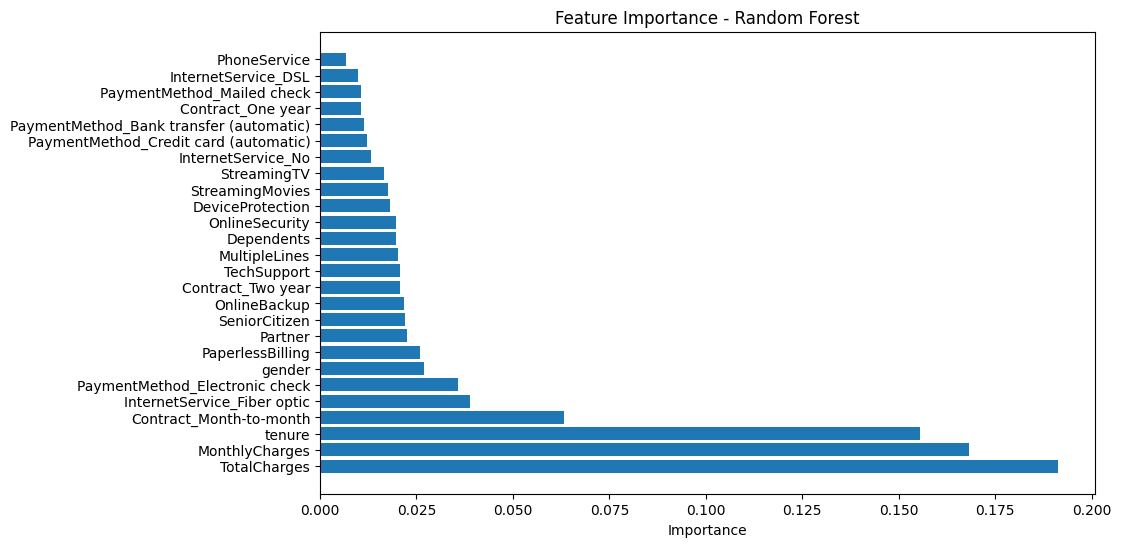

In [54]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

# Get feature importances
importances = model_rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


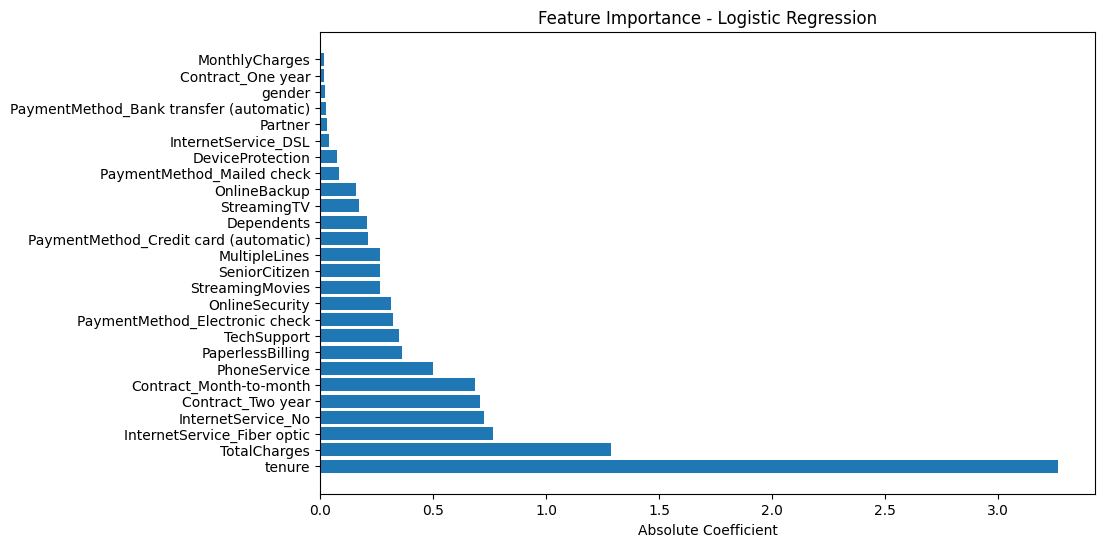

In [55]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)

# Get feature coefficients for logistic regression
coefficients = model_lr.coef_[0]

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance - Logistic Regression')
plt.show()

## Performing Hyperparameter Tuning after conducting Feature Importance

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Define the hyperparameters and their potential values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [72]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with the best hyperparameters
best_model = LogisticRegression(C=10, penalty='l1', solver='saga', max_iter=1000)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)


In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[933 105]
 [166 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [76]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')